# **Análisis Estadístico Descriptivo**
### Datos de Encuesta: Blockchain, Criptomonedas, IA y Machine Learning

En este análisis, exploramos diversas estadísticas descriptivas de los datos, organizadas en las siguientes secciones:
1. **Organización y Presentación de Datos.**
2. **Medidas de Tendencia Central o Posición.**
3. **Medidas de Dispersión o Variabilidad.**
4. **Medidas de Forma.**

Cada sección incluye:
- Explicación de las métricas.
- Cálculos y visualizaciones.

---


In [10]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de gráficos
sns.set_style("whitegrid")
sns.set_palette("viridis")

# Cargar los datos
file_path = "Respuestas.xlsx"  # Ruta del archivo
df = pd.read_excel(file_path, sheet_name="Respuestas de formulario 1")




## **1. Organización y Presentación de Datos**

### Objetivo:
Organizar y visualizar los datos categóricos y numéricos de la encuesta para entender su distribución. Esto incluye:


---
# Clasificación por género.

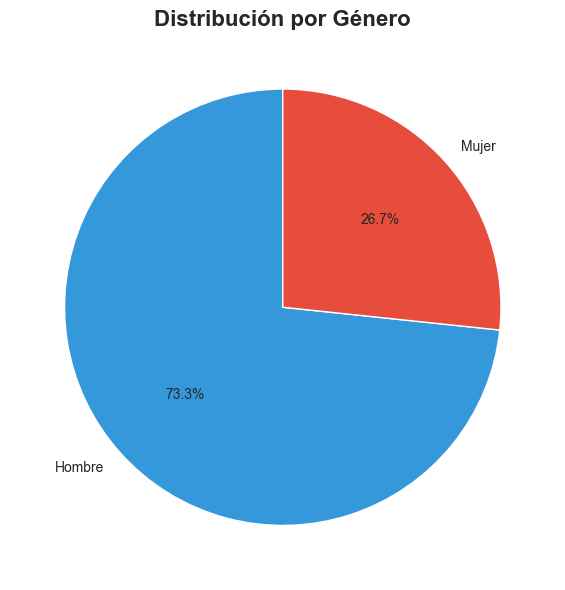

In [11]:
# Clasificar y calcular porcentajes por género
gender_counts = df['Genero'].value_counts(normalize=True) * 100

# Gráfico circular
plt.figure(figsize=(8, 6))
gender_counts.plot.pie(
    autopct='%1.1f%%', startangle=90,
    colors=['#3498db', '#e74c3c', '#2ecc71'],  # Colores personalizados
    labels=gender_counts.index
)
plt.title("Distribución por Género", fontsize=16, weight='bold')
plt.ylabel("")  # Ocultar etiqueta del eje Y
plt.tight_layout()
plt.show()


## Análisis

- **Hombres**: Representan el **73.3%** del total, siendo la mayoría en esta distribución.
- **Mujeres**: Constituyen el **26.7%**, representando una minoría en comparación con los hombres.

## Interpretación

Este diagrama sugiere que existe una **desproporción significativa entre los géneros**, donde los hombres son aproximadamente tres veces más que las mujeres en este conjunto de datos. Este tipo de análisis puede ser útil para identificar desigualdades o tendencias demográficas en un grupo determinado.


# Frecuencias agrupadas para edades.


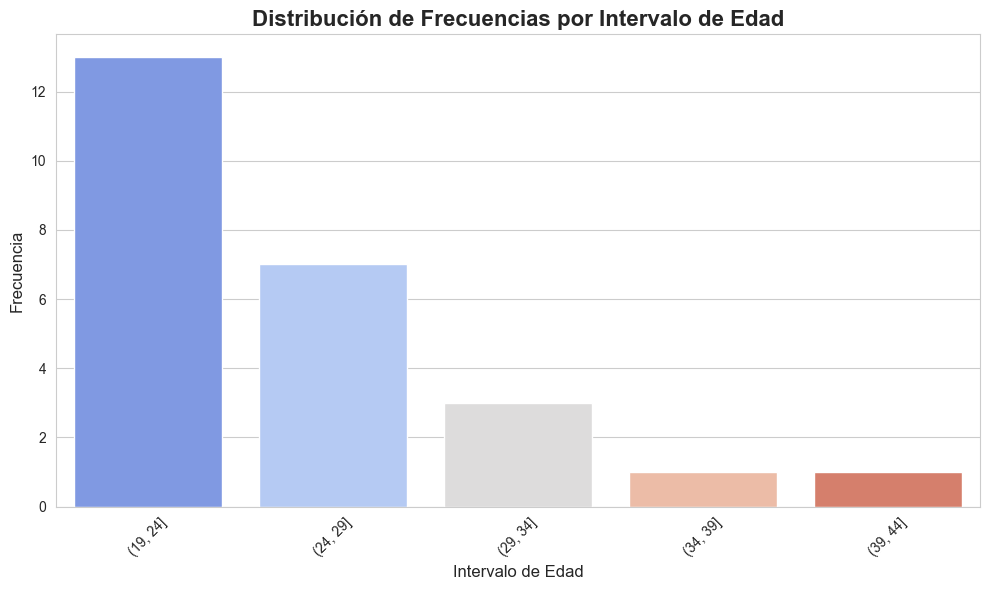

In [23]:
# Crear intervalos de 5 años
age_intervals = pd.cut(df['Edad'], bins=range(int(df['Edad'].min()), int(df['Edad'].max()) + 5, 5))

# Crear tabla de frecuencias
age_freq_table = age_intervals.value_counts(sort=False).reset_index()
age_freq_table.columns = ['Intervalo de Edad', 'Frecuencia']

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=age_freq_table['Intervalo de Edad'].astype(str), y=age_freq_table['Frecuencia'], hue=age_freq_table['Intervalo de Edad'].astype(str), palette='coolwarm', dodge=False, legend=False)
plt.title("Distribución de Frecuencias por Intervalo de Edad", fontsize=16, weight='bold')
plt.xlabel("Intervalo de Edad", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


La gráfica presentada es un **diagrama de barras** que muestra la frecuencia de individuos distribuidos en diferentes intervalos de edad. Cada barra representa un intervalo de edad específico, con su altura indicando el número de individuos que pertenecen a ese rango.

## Análisis

- **Intervalo (19, 24):** Es el grupo con la mayor frecuencia, alcanzando **12 individuos**, lo que sugiere que este rango de edad domina en el conjunto de datos.
- **Intervalo (24, 29):** Tiene una frecuencia de **7 individuos**, mostrando una disminución respecto al grupo anterior.
- **Intervalo (29, 34):** Representa **3 individuos**, una caída significativa respecto a los intervalos anteriores.
- **Intervalos (34, 39) y (39, 44):** Cada uno tiene una frecuencia de **2 individuos**, siendo los grupos menos representados en esta distribución.

## Interpretación

La distribución muestra que la mayoría de los individuos se concentran en los rangos de edad más jóvenes, especialmente entre **19 y 24 años**. A medida que aumenta la edad, la frecuencia disminuye progresivamente, lo que indica una menor representación de grupos etarios mayores en el conjunto de datos.




## **2. Medidas de Tendencia Central o Posición**

### Objetivo:
Calcular y analizar medidas como:
- **Media:** Valor promedio de los datos.
- **Mediana:** Valor central de los datos ordenados.
- **Moda:** Valor más frecuente.

Estas medidas resumen el "centro" de los datos.

---


Media: 24.37, Mediana: 22.0, Moda: 20


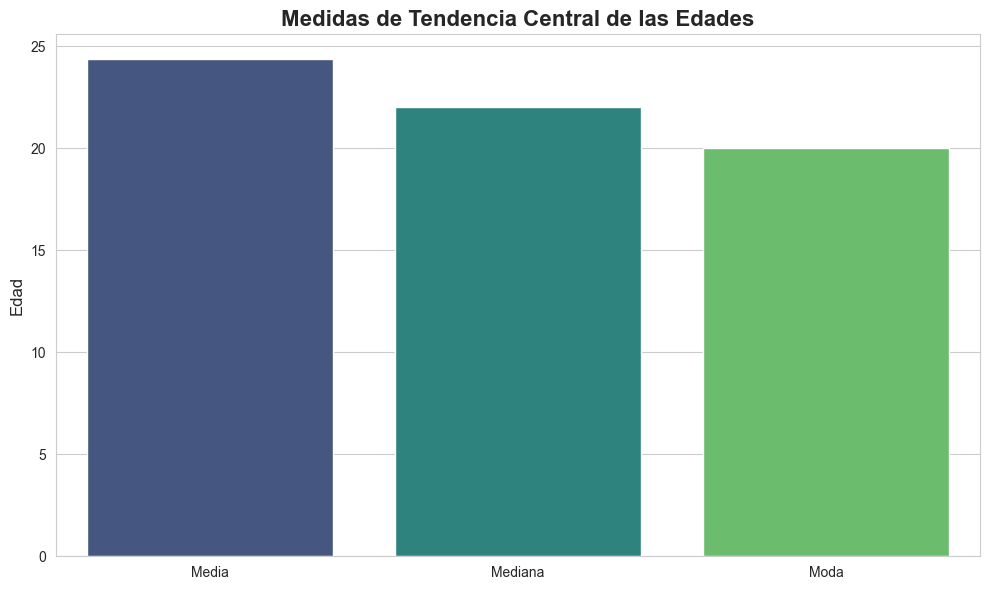

In [26]:
# Calcular medidas de tendencia central
mean_age = df['Edad'].mean()
median_age = df['Edad'].median()
mode_age = df['Edad'].mode()[0]

# Mostrar resultados
print(f"Media: {mean_age:.2f}, Mediana: {median_age}, Moda: {mode_age}")
# Gráfico de medidas de tendencia central
plt.figure(figsize=(10, 6))
central_measures = pd.DataFrame({
    'Medida': ['Media', 'Mediana', 'Moda'],
    'Valor': [mean_age, median_age, mode_age]
})
sns.barplot(x='Medida', y='Valor', data=central_measures, hue='Medida', palette='viridis', dodge=False, legend=False)
plt.title("Medidas de Tendencia Central de las Edades", fontsize=16, weight='bold')
plt.ylabel("Edad", fontsize=12)
plt.xlabel("")
plt.tight_layout()
plt.show()

### Resultados
Los resultados obtenidos son:
- **Media**: 24.37 años
- **Mediana**: 22 años
- **Moda**: 20 años

### Interpretación
- **Media**: Indica que, en promedio, las personas tienen aproximadamente 24.37 años. Es una medida útil, pero puede ser afectada por valores extremos (outliers).
- **Mediana**: Al ser 22 años, nos dice que la mitad de las personas tienen una edad igual o menor a 22 años, y la otra mitad tienen una edad mayor.
- **Moda**: Con un valor de 20 años, representa la edad que aparece con mayor frecuencia en el conjunto de datos.

Estas medidas juntas proporcionan una idea clara sobre cómo se distribuyen las edades en la población analizada.

# Distribución de Niveles de Conocimiento en Blockchain

El nivel de conocimiento más frecuente en Blockchain es: Ninguno


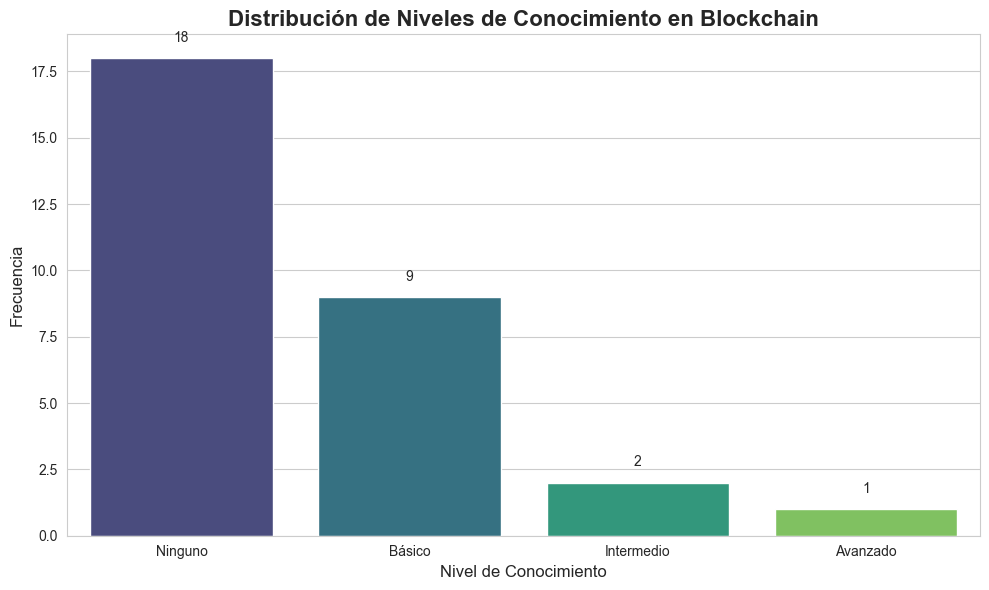

In [28]:
# Calcular moda del conocimiento en Blockchain
mode_blockchain = df['¿Cuál es tu nivel de conocimiento sobre Blockchain? '].mode()[0]

# Mostrar resultados
print(f"El nivel de conocimiento más frecuente en Blockchain es: {mode_blockchain}")
# Contar los niveles de conocimiento en Blockchain
knowledge_counts = df['¿Cuál es tu nivel de conocimiento sobre Blockchain? '].value_counts()

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=knowledge_counts.index, y=knowledge_counts.values, hue=knowledge_counts.index, palette='viridis', dodge=False, legend=False)
plt.title("Distribución de Niveles de Conocimiento en Blockchain", fontsize=16, weight='bold')
plt.xlabel("Nivel de Conocimiento", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)

# Añadir anotaciones en las barras
for i in range(len(knowledge_counts)):
	plt.text(i, knowledge_counts.values[i] + 0.5, str(knowledge_counts.values[i]), ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Observaciones Clave

1. **Mayoría sin conocimiento previo**:
   - El nivel **Ninguno** es el más frecuente, con un total de **18 respuestas**. Esto indica que una gran parte de los encuestados no tiene conocimientos previos sobre Blockchain.

2. **Conocimientos básicos**:
   - El nivel **Básico** ocupa el segundo lugar, con **9 respuestas**. Esto sugiere que algunos encuestados tienen una comprensión inicial sobre Blockchain.

3. **Conocimientos intermedios y avanzados**:
   - El nivel **Intermedio** es mucho menos común, con solo **2 respuestas**.
   - El nivel **Avanzado** es el menos frecuente, representado por **1 respuesta**, lo que indica que muy pocos encuestados tienen un conocimiento profundo sobre el tema.



## **3. Medidas de Dispersión o Variabilidad**

### Objetivo:
Analizar cómo se dispersan los datos alrededor de la media mediante:
- **Rango:** Diferencia entre el valor máximo y mínimo.
- **Desviación Estándar:** Mide la dispersión respecto a la media.

Estas métricas complementan las medidas de tendencia central.

---
# Desviación Estándar

In [15]:
# Calcular desviación estándar
std_age = df['Edad'].std()

# Mostrar resultado
print(f"La desviación estándar de las edades es: {std_age:.2f}")


La desviación estándar de las edades es: 5.72


## Resultados

### 1. **Desviación Estándar**
El resultado obtenido es:
- **Desviación Estándar**: 5.72

#### Interpretación:
- Una desviación estándar de **5.72** significa que, en promedio, las edades están a esta distancia de la media.
- Cuanto mayor sea este valor, más dispersos están los datos en torno a la media.

---

# Rango

In [30]:
# Calcular rango
range_age = df['Edad'].max() - df['Edad'].min()

# Mostrar resultado
print(f"El rango de las edades es: {range_age}")


El rango de las edades es: 23



# Resultados

### 2. **Rango**
El resultado obtenido es:
- **Rango**: 23

#### Interpretación:
- El rango de **23** indica que hay una diferencia de 23 años entre la persona más joven y la más vieja en el conjunto de datos.
- Aunque el rango da una idea de la variabilidad total, no considera cómo están distribuidos los datos entre el valor mínimo y el máximo.

---



## **4. Medidas de Forma**

### Objetivo:
Analizar la forma de los datos mediante:
- **Asimetría:** Mide si los datos están sesgados hacia la derecha o izquierda.
- **Curtosis:** Mide si los datos tienen colas largas o cortas.

Estas métricas ayudan a entender mejor la distribución de los datos.

---
# Asimetría

In [17]:
# Calcular coeficiente de asimetría
skewness_age = df['Edad'].skew()

# Mostrar resultado
print(f"El coeficiente de asimetría de las edades es: {skewness_age:.2f}")


El coeficiente de asimetría de las edades es: 1.31


## Resultados

### 1. **Asimetría (Skewness)**
El resultado obtenido es:
- **Coeficiente de asimetría**: 1.31

#### Interpretación:
- Un valor de **1.31** indica que la distribución tiene una **asimetría positiva**. Esto significa que la mayoría de los valores están concentrados hacia la izquierda, mientras que los valores más altos (hacia la derecha) son menos frecuentes, generando una cola más larga en ese lado.

---

# Curtosis

In [18]:
# Calcular coeficiente de curtosis
kurtosis_age = df['Edad'].kurt()

# Mostrar resultado
print(f"El coeficiente de curtosis de las edades es: {kurtosis_age:.2f}")


El coeficiente de curtosis de las edades es: 1.65


### 2. **Curtosis (Kurtosis) - resultado**
El resultado obtenido es:
- **Coeficiente de curtosis**: 1.65

#### Interpretación:
- Un valor de **1.65** indica que la distribución tiene una curtosis **ligeramente mayor que la normal (mesocúrtica)**. Esto significa que las colas de la distribución son moderadamente más pesadas que una distribución normal, lo que sugiere una mayor probabilidad de valores extremos.




